In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv('datasets/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

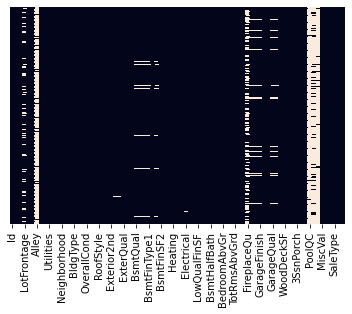

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
## Fill Missing Values

df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
df.drop(['Alley'],axis=1,inplace=True)

In [11]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [12]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [13]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [14]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [15]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [16]:
## I have basically dropped only thsoe features which have more than 60% of missing values

In [17]:
df.shape

(1460, 76)

In [18]:
df.drop(['Id'],axis=1,inplace=True)

In [19]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [20]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

<AxesSubplot:>

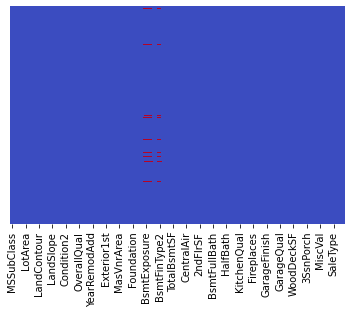

In [21]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [22]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

<AxesSubplot:>

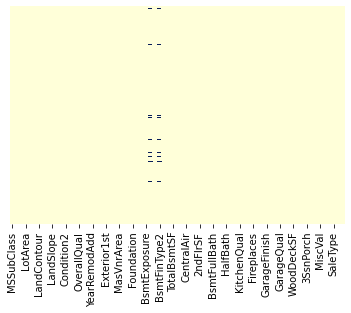

In [23]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [24]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [25]:
df.dropna(inplace=True)

In [26]:
df.shape

(1422, 75)

In [27]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [28]:
##Handle Categorical Features

In [29]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [30]:
len(columns)

39

In [31]:
def category_onehot_multcols(multicolumns, final_df):
    
    df_final=final_df
    
    i=0
    for fields in multicolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        
        if i==0:
            df_final=df1.copy()
            
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
            
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [32]:
main_df=df.copy()

In [33]:
## Combine Test Data 

test_df=pd.read_csv('modifiedtest.csv')

In [34]:
test_df.shape

(1459, 74)

In [35]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


Noticed that there are some categorical features in test dataset for which the categories are different from our training dataset, thus I concatenated the training and test dataset first before applying one-hot encoding for the categorical features to incorporate the difference in the categories.

In [36]:
final_df=pd.concat([df,test_df],axis=0)

In [37]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [38]:
final_df.shape

(2881, 75)

In [39]:
final_df=category_onehot_multcols(columns, final_df)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [40]:
final_df.shape

(2881, 235)

In [41]:
#remove duplicate columns

final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [42]:
final_df.shape

(2881, 175)

In [43]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [44]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [45]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [46]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [47]:
df_Train.shape

(1422, 175)

In [48]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [49]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [50]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [51]:
X_train.shape

(1422, 174)

### Prediciton and selecting the Algorithm

In [53]:
conda install -c anaconda py-xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/snigdhakakkar/opt/anaconda2/envs/tf

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  anaconda
    libxgboost-0.90            |       hb1e8313_1         2.3 MB  anaconda
    py-xgboost-0.90            |   py37hb1e8313_1          76 KB  anaconda
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/osx-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         anaconda/osx-64::libxgboo

In [54]:
import xgboost
classifier=xgboost.XGBRegressor()

In [55]:
import xgboost
regressor=xgboost.XGBRegressor()

In [56]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [57]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [59]:
from sklearn.model_selection import RandomizedSearchCV
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [60]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   48.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  6.3min


[CV] n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75 
[15:39:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75, score=(train=-20948.916, test=-21203.830), total=  16.5s
[CV] n_estimators=1100, min_child_weight=4, max_depth=3, learning_rate=0.1, booster=gbtree, base_score=1 
[15:39:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=1100, min_child_weight=4, max_depth=3, learning_rate=0.1, booster=gbtree, base_score=1, score=(train=-2170.611, test=-16890.249), total=  23.3s
[CV] n_estimators=500, min_child_weight=4, max_depth=10, learning_rate=0.1, booster=gblinear, base_score=0.75 
[15:39:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squa

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 12.4min


[CV] n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75 
[15:39:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75, score=(train=-21338.040, test=-21200.300), total=  16.2s
[CV] n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75 
[15:39:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75, score=(train=-20540.704, test=-24540.214), total=  16.4s
[CV] n_estimators=1100, min_child_weight=4, max_depth=3, learning_rate=0.1, booster=gbtree, base_score=1 
[15:39:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

[CV]  n_estimators=900, min_child_weight=2, max_depth=5, learning_rate=0.15, booster=gblinear, base_score=0.75, score=(train=-21863.409, test=-20873.256), total=  10.1s[CV] n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75 
[15:39:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75, score=(train=-21178.815, test=-22207.231), total=  16.3s
[CV] n_estimators=1100, min_child_weight=4, max_depth=3, learning_rate=0.1, booster=gbtree, base_score=1 
[15:39:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=1100, min_child_weight=4, max_depth=3, learning_rate=0.1, booster=gbtree, base_score=1, score=(train=-2160.108, test=-16988.993), total=  23.3s
[CV] n_estimators=1100, min_child_weight=4, max_d

[CV]  n_estimators=900, min_child_weight=1, max_depth=15, learning_rate=0.1, booster=gbtree, base_score=1, score=(train=-0.081, test=-18416.993), total= 1.1min[CV] n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75 
[15:39:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=1500, min_child_weight=1, max_depth=15, learning_rate=0.2, booster=gblinear, base_score=0.75, score=(train=-21832.902, test=-20848.437), total=  16.3s
[CV] n_estimators=1100, min_child_weight=4, max_depth=3, learning_rate=0.1, booster=gbtree, base_score=1 
[15:39:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=1100, min_child_weight=4, max_depth=3, learning_rate=0.1, booster=gbtree, base_score=1, score=(train=-2249.678, test=-15909.905), total=  23.4s
[CV] n_estimators=500, min_child_weight=4, max_depth=10, l

[CV] n_estimators=900, min_child_weight=2, max_depth=5, learning_rate=0.15, booster=gblinear, base_score=0.75 
[CV] n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.15, booster=gbtree, base_score=0.5 
[15:48:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-0.143, test=-17557.702), total=  34.4s
[CV] n_estimators=100, min_child_weight=2, max_depth=2, learning_rate=0.15, booster=gblinear, base_score=0.25 
[15:48:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=100, min_child_weight=2, max_depth=2, learning_rate=0.15, booster=gblinear, base_score=0.25, score=(train=-21813.548, test=-21026.383), total=   1.1s
[CV] n_estimators=100, min_child_weight=2, max_depth=2, learning_rate=0.15, booster=gblinear, base_score=

[CV]  n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.05, booster=gblinear, base_score=0.25, score=(train=-22690.205, test=-23065.225), total=   1.1s
[CV] n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.05, booster=gblinear, base_score=0.5 
[15:45:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=500, min_child_weight=4, max_depth=3, learning_rate=0.05, booster=gblinear, base_score=0.5, score=(train=-21010.597, test=-25235.441), total=   5.2s
[CV] n_estimators=900, min_child_weight=1, max_depth=15, learning_rate=0.1, booster=gbtree, base_score=1 
[15:45:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=900, min_child_weight=1, max_depth=15, learning_rate=0.1, booster=gbtree, base_score=1, score=(train=-7.359, test=-16001.439), total= 1.1min
[CV] n_estimators=900, min_child_weight=4, max_depth=2

[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 20.2min finished


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [61]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900)

In [62]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900)

In [77]:
regressor=xgboost.XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900)

In [78]:
regressor.fit(X_train,y_train)

[16:04:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, max_depth=2, n_estimators=900)

In [66]:
import pickle

In [67]:
filename = 'finalized_modelV1.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [68]:
df_Test.shape

(1459, 174)

In [69]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [70]:
y_pred=regressor.predict(df_Test)

In [71]:
y_pred

array([117275.625, 163568.39 , 188306.14 , ..., 181178.69 , 115435.21 ,
       236526.36 ], dtype=float32)

In [72]:
##Create Sample Submission file and Submit
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('datasets/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submissionv1.csv',index=False)

#### I submitted this result to the Kaggle submission and got Rank: 1379 and Score: 0.13727. Now, I will use ANN to optimize and see if I can get better results.


### Artificial Neural Network Implementation

In [79]:
pred.columns=['SalePrice']

In [80]:
pred

,SalePrice
0,117275.625000
1,163568.390625
2,188306.140625
3,193885.375000
4,185424.812500
...,...
1454,85311.835938
1455,66737.593750
1456,181178.687500
1457,115435.210938


In [81]:
temp_df=df_Train['SalePrice'].copy()


[CV] n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.05, booster=gblinear, base_score=0.25 
[15:51:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.05, booster=gblinear, base_score=0.25, score=(train=-22229.231, test=-25926.574), total=   1.3s
[CV] n_estimators=1500, min_child_weight=3, max_depth=15, learning_rate=0.15, booster=gbtree, base_score=0.5 
[15:51:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=1500, min_child_weight=3, max_depth=15, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-7.324, test=-17449.416), total= 2.0min
[CV] n_estimators=1500, min_child_weight=3, max_depth=2, learning_rate=0.2, booster=gblinear, base_score=1 
[15:53:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:s

In [82]:
temp_df.column=['SalePrice']


[15:47:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=900, min_child_weight=2, max_depth=5, learning_rate=0.15, booster=gblinear, base_score=0.75, score=(train=-21188.382, test=-22215.758), total=  10.0s
[CV] n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.15, booster=gbtree, base_score=0.5 
[15:47:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.15, booster=gbtree, base_score=0.5, score=(train=-7.356, test=-15952.017), total=  34.8s
[CV] n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.15, booster=gbtree, base_score=0.5 
[15:48:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=500, min_child_weight=3, max_depth=15, learning_rate=0.15, booster=gbtree, base_sc


[CV] n_estimators=500, min_child_weight=3, max_depth=2, learning_rate=0.15, booster=gbtree, base_score=0.75 
[15:51:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=500, min_child_weight=3, max_depth=2, learning_rate=0.15, booster=gbtree, base_score=0.75, score=(train=-7361.801, test=-15056.542), total=   8.1s
[CV] n_estimators=500, min_child_weight=3, max_depth=2, learning_rate=0.15, booster=gbtree, base_score=0.75 
[15:51:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=500, min_child_weight=3, max_depth=2, learning_rate=0.15, booster=gbtree, base_score=0.75, score=(train=-7634.430, test=-13996.257), total=   9.0s
[CV] n_estimators=100, min_child_weight=4, max_depth=15, learning_rate=0.05, booster=gblinear, base_score=0.25 
[15:51:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squ

In [83]:
temp_df

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1422, dtype: float64

In [84]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

/Users/snigdhakakkar/opt/anaconda2/envs/tf/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [85]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [86]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,1,1,0,0,0,0,1,0,208500.0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,1,1,0,0,0,0,1,0,181500.0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,1,1,0,0,0,0,1,0,223500.0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,1,0,0,0,0,1,0,0,140000.0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,1,1,0,0,0,0,1,0,250000.0


In [87]:
df_Test=pd.concat([df_Test,pred],axis=1)

In [88]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [89]:
df_Train.shape

(2881, 175)

In [90]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [91]:
X_train.shape, y_train.shape

((2881, 174), (2881,))

In [92]:
import tensorflow as tf

In [93]:
#Implementing ANN

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [94]:
# Initialising the ANN
classifier = Sequential()

In [99]:
from tensorflow.keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [100]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(units = 25, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

Train on 2304 samples, validate on 577 samples
Epoch 1/1000
2304/2304 [==============================] - 3s 2ms/sample - loss: 100610.3061 - val_loss: 53920.3239
Epoch 2/1000
2304/2304 [==============================] - 1s 500us/sample - loss: 62624.8602 - val_loss: 48092.0935
Epoch 3/1000
2304/2304 [==============================] - 1s 491us/sample - loss: 53974.8049 - val_loss: 40582.9772
Epoch 4/1000
2304/2304 [==============================] - 1s 498us/sample - loss: 46423.7883 - val_loss: 39023.5726
Epoch 5/1000
2304/2304 [==============================] - 1s 505us/sample - loss: 40460.0472 - val_loss: 33138.0150
Epoch 6/1000
2304/2304 [==============================] - 1s 495us/sample - loss: 37726.4488 - val_loss: 32836.1822
Epoch 7/1000
2304/2304 [==============================] - 1s 503us/sample - loss: 36518.4189 - val_loss: 33322.0319
Epoch 8/1000
2304/2304 [==============================] - 1s 501us/sample - loss: 35541.1317 - val_loss: 32292.1495
Epoch 9/1000
2304/2304 [==

2304/2304 [==============================] - 1s 497us/sample - loss: 29692.0236 - val_loss: 29875.6174
Epoch 71/1000
2304/2304 [==============================] - 1s 509us/sample - loss: 29444.5205 - val_loss: 26540.1107
Epoch 72/1000
2304/2304 [==============================] - 1s 589us/sample - loss: 29459.9074 - val_loss: 26313.4876
Epoch 73/1000
2304/2304 [==============================] - 1s 547us/sample - loss: 29191.8262 - val_loss: 29106.9236
Epoch 74/1000
2304/2304 [==============================] - 1s 497us/sample - loss: 29503.3013 - val_loss: 26534.2318
Epoch 75/1000
2304/2304 [==============================] - 1s 494us/sample - loss: 29280.2554 - val_loss: 27114.8462
Epoch 76/1000
2304/2304 [==============================] - 1s 489us/sample - loss: 29174.5754 - val_loss: 26228.2049
Epoch 77/1000
2304/2304 [==============================] - 1s 511us/sample - loss: 29214.9228 - val_loss: 26112.4929
Epoch 78/1000
2304/2304 [==============================] - 1s 500us/sample - l

Epoch 140/1000
2304/2304 [==============================] - 1s 492us/sample - loss: 24500.3124 - val_loss: 20853.1173
Epoch 141/1000
2304/2304 [==============================] - 1s 491us/sample - loss: 25239.1302 - val_loss: 22036.4961
Epoch 142/1000
2304/2304 [==============================] - 1s 493us/sample - loss: 24234.8707 - val_loss: 21574.0851
Epoch 143/1000
2304/2304 [==============================] - 1s 519us/sample - loss: 25061.6298 - val_loss: 20099.0046
Epoch 144/1000
2304/2304 [==============================] - 1s 482us/sample - loss: 24424.9266 - val_loss: 27106.5652
Epoch 145/1000
2304/2304 [==============================] - 1s 488us/sample - loss: 24742.8442 - val_loss: 26709.8216
Epoch 146/1000
2304/2304 [==============================] - 1s 495us/sample - loss: 24833.5745 - val_loss: 19753.6097
Epoch 147/1000
2304/2304 [==============================] - 1s 490us/sample - loss: 24647.3930 - val_loss: 23213.5274
Epoch 148/1000
2304/2304 [==============================

2304/2304 [==============================] - 1s 485us/sample - loss: 21641.1079 - val_loss: 17902.7225
Epoch 210/1000
2304/2304 [==============================] - 1s 495us/sample - loss: 21787.8379 - val_loss: 17926.2821
Epoch 211/1000
2304/2304 [==============================] - 1s 494us/sample - loss: 21799.7741 - val_loss: 17566.6574
Epoch 212/1000
2304/2304 [==============================] - 1s 485us/sample - loss: 21564.2629 - val_loss: 20316.5893
Epoch 213/1000
2304/2304 [==============================] - 1s 484us/sample - loss: 22114.7999 - val_loss: 19941.8110
Epoch 214/1000
2304/2304 [==============================] - 1s 494us/sample - loss: 21901.6676 - val_loss: 16867.5774
Epoch 215/1000
2304/2304 [==============================] - 1s 485us/sample - loss: 21368.6891 - val_loss: 17208.5561
Epoch 216/1000
2304/2304 [==============================] - 1s 489us/sample - loss: 21540.4161 - val_loss: 16543.0084
Epoch 217/1000
2304/2304 [==============================] - 1s 486us/sa

2304/2304 [==============================] - 1s 480us/sample - loss: 20217.6465 - val_loss: 15580.8189
Epoch 279/1000
2304/2304 [==============================] - 1s 484us/sample - loss: 19728.1291 - val_loss: 17644.7122
Epoch 280/1000
2304/2304 [==============================] - 1s 492us/sample - loss: 20696.4248 - val_loss: 18948.0600
Epoch 281/1000
2304/2304 [==============================] - 1s 487us/sample - loss: 20588.9868 - val_loss: 17428.5123
Epoch 282/1000
2304/2304 [==============================] - 1s 492us/sample - loss: 19589.4809 - val_loss: 20479.4494
Epoch 283/1000
2304/2304 [==============================] - 1s 486us/sample - loss: 19989.3347 - val_loss: 24592.2773
Epoch 284/1000
2304/2304 [==============================] - 1s 493us/sample - loss: 19601.1443 - val_loss: 17958.3367
Epoch 285/1000
2304/2304 [==============================] - 1s 488us/sample - loss: 19954.8026 - val_loss: 18391.1648
Epoch 286/1000
2304/2304 [==============================] - 1s 496us/sa

2304/2304 [==============================] - 1s 496us/sample - loss: 19091.0828 - val_loss: 14622.8600
Epoch 348/1000
2304/2304 [==============================] - 1s 483us/sample - loss: 19150.9280 - val_loss: 14781.1418
Epoch 349/1000
2304/2304 [==============================] - 1s 481us/sample - loss: 18563.3202 - val_loss: 15093.6779
Epoch 350/1000
2304/2304 [==============================] - 1s 501us/sample - loss: 18093.9668 - val_loss: 15252.5118
Epoch 351/1000
2304/2304 [==============================] - 1s 488us/sample - loss: 18138.9707 - val_loss: 15167.6067
Epoch 352/1000
2304/2304 [==============================] - 1s 492us/sample - loss: 19334.5229 - val_loss: 21899.9393
Epoch 353/1000
2304/2304 [==============================] - 1s 483us/sample - loss: 18669.1184 - val_loss: 15609.1030
Epoch 354/1000
2304/2304 [==============================] - 1s 488us/sample - loss: 18894.4427 - val_loss: 16501.3490
Epoch 355/1000
2304/2304 [==============================] - 1s 500us/sa

2304/2304 [==============================] - 1s 493us/sample - loss: 17858.6398 - val_loss: 13997.8462
Epoch 417/1000
2304/2304 [==============================] - 1s 507us/sample - loss: 17744.4949 - val_loss: 13878.2441
Epoch 418/1000
2304/2304 [==============================] - 1s 485us/sample - loss: 17950.9709 - val_loss: 15904.3755
Epoch 419/1000
2304/2304 [==============================] - 1s 491us/sample - loss: 17668.5522 - val_loss: 15351.7475
Epoch 420/1000
2304/2304 [==============================] - 1s 483us/sample - loss: 18052.5855 - val_loss: 19330.3221
Epoch 421/1000
2304/2304 [==============================] - 1s 492us/sample - loss: 17181.9798 - val_loss: 15727.2408
Epoch 422/1000
2304/2304 [==============================] - 1s 484us/sample - loss: 17745.8906 - val_loss: 14368.8888
Epoch 423/1000
2304/2304 [==============================] - 1s 499us/sample - loss: 18746.1957 - val_loss: 17281.9269
Epoch 424/1000
2304/2304 [==============================] - 1s 485us/sa

2304/2304 [==============================] - 1s 494us/sample - loss: 17447.9842 - val_loss: 14588.2550
Epoch 486/1000
2304/2304 [==============================] - 1s 483us/sample - loss: 17713.7349 - val_loss: 14623.9465
Epoch 487/1000
2304/2304 [==============================] - 1s 502us/sample - loss: 16546.4448 - val_loss: 16734.7817
Epoch 488/1000
2304/2304 [==============================] - 1s 491us/sample - loss: 17286.8523 - val_loss: 13733.6928
Epoch 489/1000
2304/2304 [==============================] - 1s 497us/sample - loss: 17283.2237 - val_loss: 15606.1923
Epoch 490/1000
2304/2304 [==============================] - 1s 509us/sample - loss: 17584.8875 - val_loss: 13756.1386
Epoch 491/1000
2304/2304 [==============================] - 1s 526us/sample - loss: 16407.3924 - val_loss: 14483.8182
Epoch 492/1000
2304/2304 [==============================] - 1s 534us/sample - loss: 17031.1532 - val_loss: 18642.7856
Epoch 493/1000
2304/2304 [==============================] - 1s 501us/sa

2304/2304 [==============================] - 1s 484us/sample - loss: 16713.6939 - val_loss: 17174.6470
Epoch 555/1000
2304/2304 [==============================] - 1s 486us/sample - loss: 16502.2020 - val_loss: 17420.0688
Epoch 556/1000
2304/2304 [==============================] - 1s 494us/sample - loss: 16315.3013 - val_loss: 13813.6409
Epoch 557/1000
2304/2304 [==============================] - 1s 484us/sample - loss: 16613.3173 - val_loss: 15340.5970
Epoch 558/1000
2304/2304 [==============================] - 1s 482us/sample - loss: 16017.7930 - val_loss: 13539.3348
Epoch 559/1000
2304/2304 [==============================] - 1s 482us/sample - loss: 16082.4083 - val_loss: 14641.8257
Epoch 560/1000
2304/2304 [==============================] - 1s 488us/sample - loss: 16579.8886 - val_loss: 13630.6298
Epoch 561/1000
2304/2304 [==============================] - 1s 500us/sample - loss: 16585.3433 - val_loss: 13862.8308
Epoch 562/1000
2304/2304 [==============================] - 1s 494us/sa

2304/2304 [==============================] - 1s 483us/sample - loss: 16043.5125 - val_loss: 13562.7723
Epoch 624/1000
2304/2304 [==============================] - 1s 486us/sample - loss: 15903.5612 - val_loss: 14518.7710
Epoch 625/1000
2304/2304 [==============================] - 1s 482us/sample - loss: 16083.6299 - val_loss: 15285.8314
Epoch 626/1000
2304/2304 [==============================] - 1s 492us/sample - loss: 16341.2674 - val_loss: 14853.7014
Epoch 627/1000
2304/2304 [==============================] - 1s 483us/sample - loss: 16016.8797 - val_loss: 13463.8490
Epoch 628/1000
2304/2304 [==============================] - 1s 499us/sample - loss: 15491.5048 - val_loss: 13238.5734
Epoch 629/1000
2304/2304 [==============================] - 1s 487us/sample - loss: 15904.8504 - val_loss: 15450.8245
Epoch 630/1000
2304/2304 [==============================] - 1s 504us/sample - loss: 16103.1639 - val_loss: 14083.3109
Epoch 631/1000
2304/2304 [==============================] - 1s 488us/sa

2304/2304 [==============================] - 1s 427us/sample - loss: 15624.1193 - val_loss: 13282.4605
Epoch 693/1000
2304/2304 [==============================] - 1s 436us/sample - loss: 15324.2036 - val_loss: 13149.3997
Epoch 694/1000
2304/2304 [==============================] - 1s 433us/sample - loss: 15570.4064 - val_loss: 14406.5906
Epoch 695/1000
2304/2304 [==============================] - 1s 430us/sample - loss: 15729.6734 - val_loss: 14918.4821
Epoch 696/1000
2304/2304 [==============================] - 1s 432us/sample - loss: 15184.7566 - val_loss: 13231.7180
Epoch 697/1000
2304/2304 [==============================] - 1s 428us/sample - loss: 15144.4683 - val_loss: 13929.0606
Epoch 698/1000
2304/2304 [==============================] - 1s 521us/sample - loss: 15517.0002 - val_loss: 19117.8182
Epoch 699/1000
2304/2304 [==============================] - 1s 454us/sample - loss: 15671.9990 - val_loss: 13222.4760
Epoch 700/1000
2304/2304 [==============================] - 1s 430us/sa

2304/2304 [==============================] - 1s 483us/sample - loss: 15122.8561 - val_loss: 15445.2869
Epoch 762/1000
2304/2304 [==============================] - 1s 567us/sample - loss: 14759.9176 - val_loss: 13967.7473
Epoch 763/1000
2304/2304 [==============================] - 1s 607us/sample - loss: 15697.7533 - val_loss: 13598.0831
Epoch 764/1000
2304/2304 [==============================] - 1s 555us/sample - loss: 15341.3001 - val_loss: 13520.7713
Epoch 765/1000
2304/2304 [==============================] - 1s 516us/sample - loss: 15293.8481 - val_loss: 13402.6230
Epoch 766/1000
2304/2304 [==============================] - 1s 543us/sample - loss: 15221.7373 - val_loss: 13005.1626
Epoch 767/1000
2304/2304 [==============================] - 1s 507us/sample - loss: 15091.4017 - val_loss: 17340.0254
Epoch 768/1000
2304/2304 [==============================] - 1s 532us/sample - loss: 15369.1744 - val_loss: 13360.5715
Epoch 769/1000
2304/2304 [==============================] - 1s 533us/sa

2304/2304 [==============================] - 1s 481us/sample - loss: 15032.7311 - val_loss: 14297.0222
Epoch 831/1000
2304/2304 [==============================] - 1s 480us/sample - loss: 14681.7560 - val_loss: 13254.0469
Epoch 832/1000
2304/2304 [==============================] - 1s 496us/sample - loss: 14739.5985 - val_loss: 13737.5505
Epoch 833/1000
2304/2304 [==============================] - 1s 496us/sample - loss: 15821.7787 - val_loss: 15130.6698
Epoch 834/1000
2304/2304 [==============================] - 1s 482us/sample - loss: 14817.5747 - val_loss: 14792.3994
Epoch 835/1000
2304/2304 [==============================] - 1s 477us/sample - loss: 15700.1062 - val_loss: 14380.7635
Epoch 836/1000
2304/2304 [==============================] - 1s 497us/sample - loss: 15078.0946 - val_loss: 12968.9987
Epoch 837/1000
2304/2304 [==============================] - 1s 484us/sample - loss: 14164.4347 - val_loss: 13279.0803
Epoch 838/1000
2304/2304 [==============================] - 1s 480us/sa

2304/2304 [==============================] - 1s 485us/sample - loss: 15659.4843 - val_loss: 15786.4620
Epoch 900/1000
2304/2304 [==============================] - 1s 478us/sample - loss: 14682.8179 - val_loss: 12797.9885
Epoch 901/1000
2304/2304 [==============================] - 1s 484us/sample - loss: 14574.6288 - val_loss: 13507.6166
Epoch 902/1000
2304/2304 [==============================] - 1s 501us/sample - loss: 14146.2343 - val_loss: 13391.4518
Epoch 903/1000
2304/2304 [==============================] - 1s 480us/sample - loss: 15051.8946 - val_loss: 16467.0598
Epoch 904/1000
2304/2304 [==============================] - 1s 490us/sample - loss: 14527.2116 - val_loss: 15494.2211
Epoch 905/1000
2304/2304 [==============================] - 1s 539us/sample - loss: 14600.5081 - val_loss: 13262.0212
Epoch 906/1000
2304/2304 [==============================] - 1s 479us/sample - loss: 14341.3718 - val_loss: 14600.7597
Epoch 907/1000
2304/2304 [==============================] - 1s 521us/sa

2304/2304 [==============================] - 1s 495us/sample - loss: 13910.0242 - val_loss: 13908.5114
Epoch 969/1000
2304/2304 [==============================] - 1s 480us/sample - loss: 13987.1072 - val_loss: 13016.7265
Epoch 970/1000
2304/2304 [==============================] - 1s 477us/sample - loss: 14698.7401 - val_loss: 15550.0537
Epoch 971/1000
2304/2304 [==============================] - 1s 498us/sample - loss: 14238.1317 - val_loss: 13098.9740
Epoch 972/1000
2304/2304 [==============================] - 1s 480us/sample - loss: 15187.1361 - val_loss: 13679.0619
Epoch 973/1000
2304/2304 [==============================] - 1s 488us/sample - loss: 13999.7697 - val_loss: 13163.5376
Epoch 974/1000
2304/2304 [==============================] - 1s 474us/sample - loss: 13923.4850 - val_loss: 15796.0157
Epoch 975/1000
2304/2304 [==============================] - 1s 481us/sample - loss: 14536.9959 - val_loss: 13401.4796
Epoch 976/1000
2304/2304 [==============================] - 1s 475us/sa

In [101]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

In [102]:
##Create Sample Submission file and Submit
pred1=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('datasets/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred1],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submissionv2.csv',index=False)